<a href="https://colab.research.google.com/github/alinspiron/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Clothing Images Using Fashion MNIST
This project has been developed in Google Colab. it utilizes framework of tensorflow 2.0.0 and tf.keras therefore it is necessary to verify version of tensorflow. In this project, Neural Network has been trained on Fasion MNIST dataset with accuracy of 91%.

---


This project has been developed using tutorial that is publicly availble on https://www.tensorflow.org with title '*Basic classification: Classify images of clothing*'


### Verify Tensorflow Version and Import Libraries

In [0]:
pip uninstall tensorflow 

In [0]:
pip install tensorflow==2.0.0

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0


### Import Fashion MNIST Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Explore Dataset

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

### Preprocess the Dataset

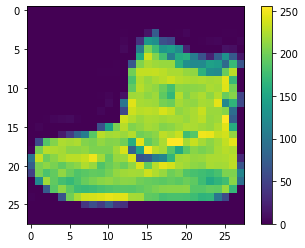

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_images = train_images / 255

test_images = test_images / 255

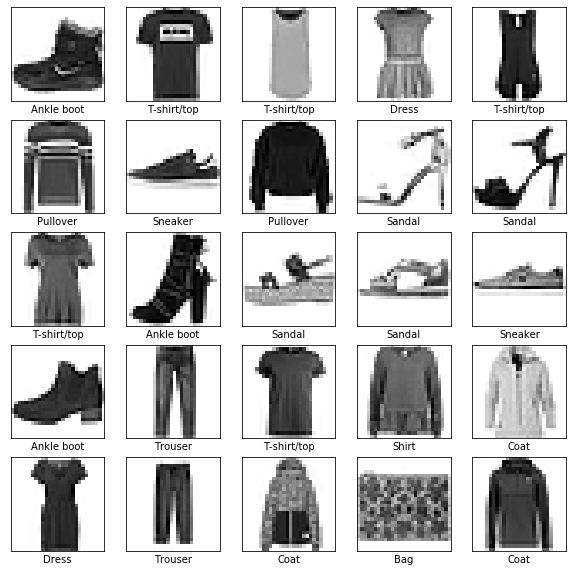

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


### Build the Model

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4966 - accuracy: 0.8243
Epoch 2/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3734 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3364 - accuracy: 0.8781
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3137 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2969 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2805 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2678 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2575 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2462 - accuracy: 0.9080
Epoch 10/10
60

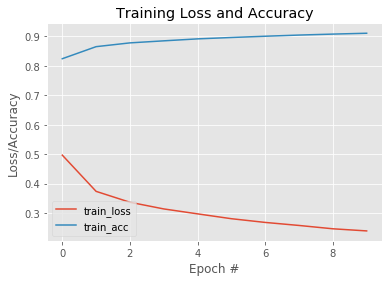

In [16]:
H = model.fit(train_images, train_labels, epochs=10)
%matplotlib inline
N = np.arange(0,  10)
plt.style.use("ggplot")
fig = plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

### Evaluation the Model on Test Dataset

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/1 - 0s - loss: 0.2234 - accuracy: 0.8877

Test accuracy: 0.8877


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [19]:
predictions = probability_model.predict(test_images)
print(predictions[1])

[4.3060863e-05 3.7428623e-11 9.9370801e-01 2.0355492e-07 5.5630016e-03
 2.1830777e-09 6.8514235e-04 6.6160456e-14 4.5528375e-07 1.6476305e-14]


### Verify Predictions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


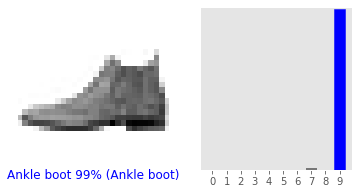

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


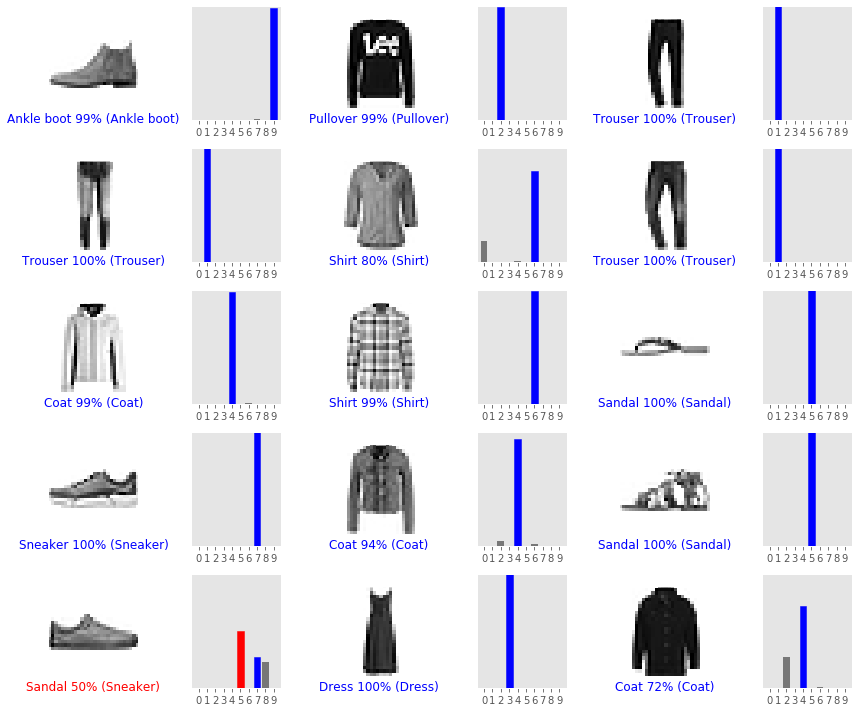

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
